In [1]:
library(stats)

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
#? kmeans
km<-kmeans(iris[,-5],3,nstart=1)
km

K-means clustering with 3 clusters of sizes 96, 33, 21

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.314583    2.895833     4.973958   1.7031250
2     5.175758    3.624242     1.472727   0.2727273
3     4.738095    2.904762     1.790476   0.3523810

Clustering vector:
  [1] 2 3 3 3 2 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 3 3 2 2 2 3 2 2
 [38] 2 3 2 2 3 3 2 2 3 2 3 2 2 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 118.651875   6.432121  17.669524
 (between_SS / total_SS =  79.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

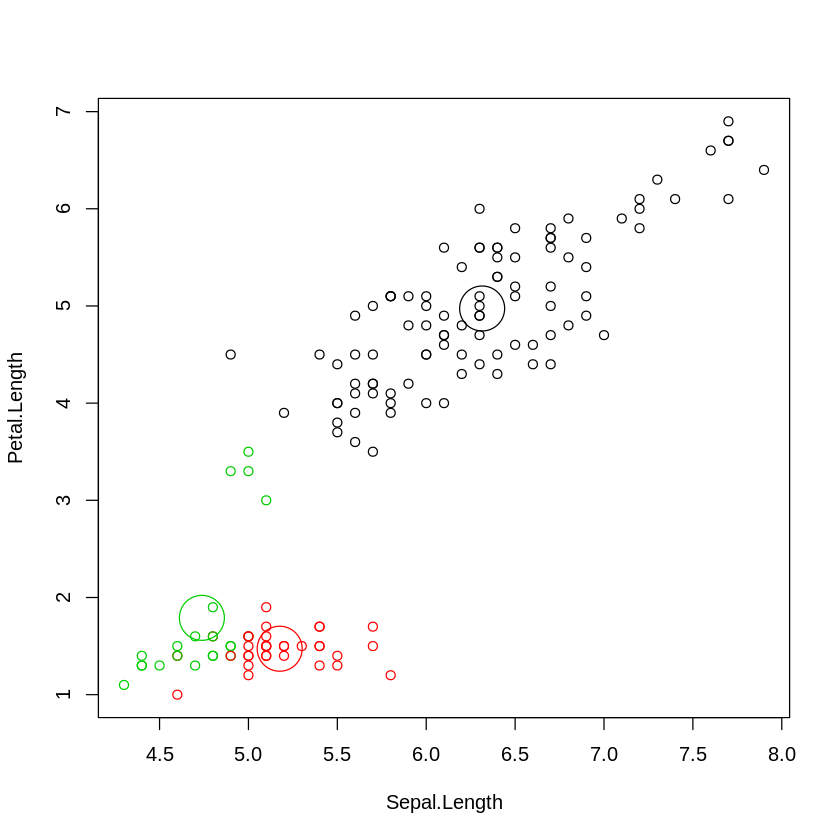

In [4]:
## Point center of two attributes
plot(iris[,c(1,3)],col=km$cluster)
points(km$centers[,c(1,3)],col=1:3,cex=5)

In [5]:
table(as.numeric(iris[,5]),km$cluster)

   
     1  2  3
  1  0 33 17
  2 46  0  4
  3 50  0  0

In [6]:
library(RSNNS)

Loading required package: Rcpp


In [ ]:
#? som

In [21]:
inputs <- normalizeData(iris[,1:4], "norm")
#::GMG:: 16x16 centroides 256 > 150 (más centroides que datos)
#::GMG:: los targets se usan solamente para visualizar
model <- som(inputs, 
             mapX=30, mapY=30, 
             maxit=500,
             calculateActMaps=TRUE, 
             targets=iris[,5])

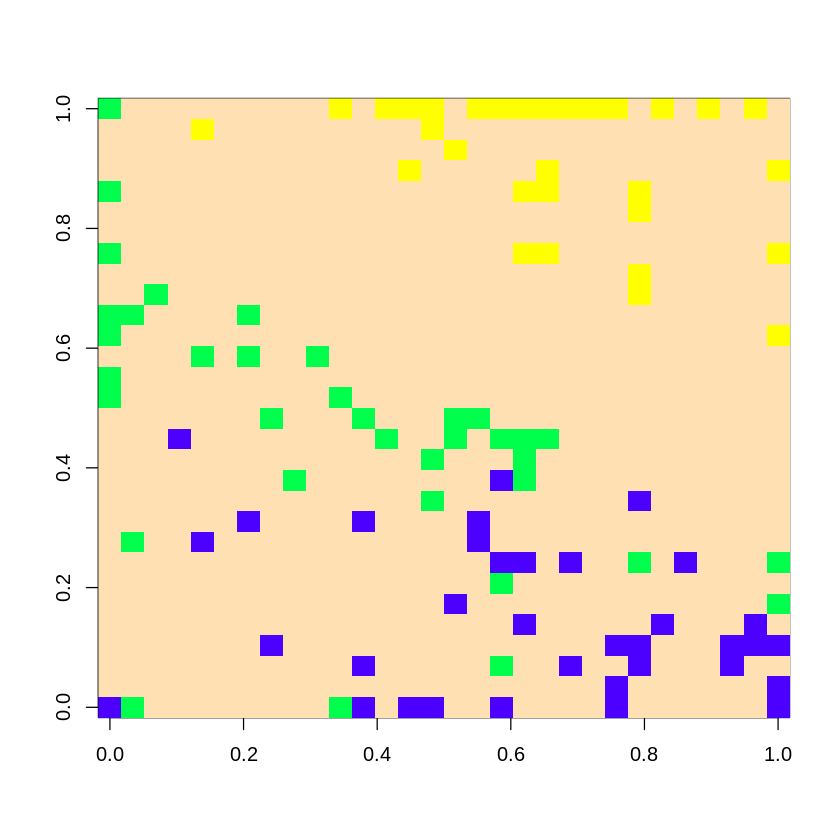

In [22]:
plotActMap(model$labeledMap,col=rev(topo.colors(12)))

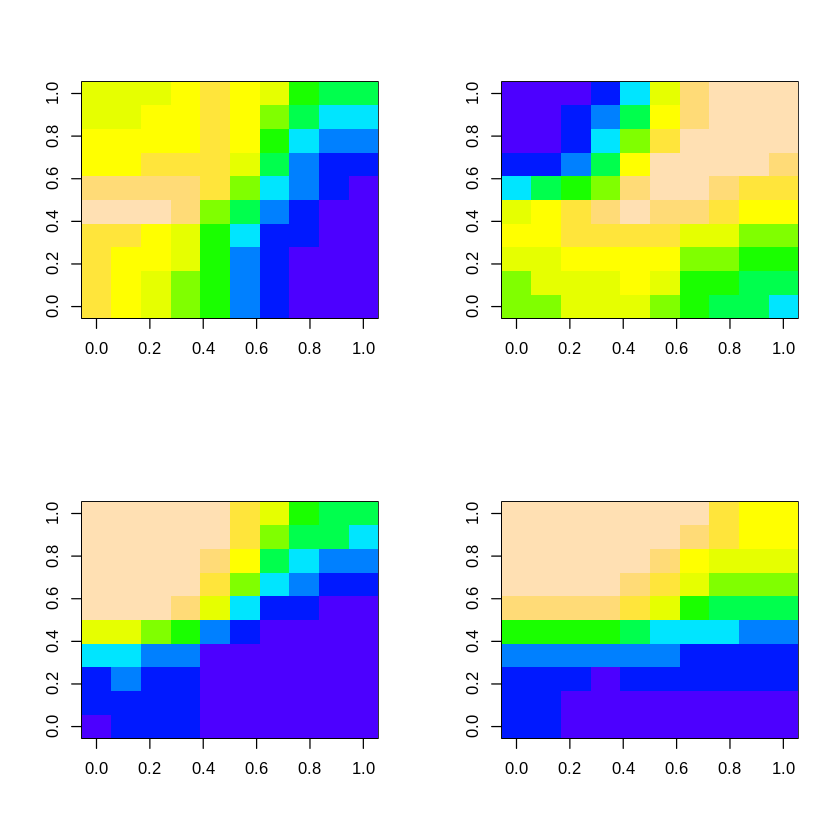

In [20]:
par(mfrow=c(2,2))
#::GMG::Se ven los diferentes centroides para diferentes variables de entrada
#::nota::esto no tiene mucha utilidad cuando hay muchas variables (!!)
for(i in 1:ncol(inputs))
  plotActMap(model$componentMaps[[i]],col=rev(topo.colors(12)))